In [1]:
from sklearn import cross_validation, grid_search, linear_model, metrics, pipeline, preprocessing

import numpy as np
import pandas as pd
%pylab inline


/home/toxa/anaconda3/envs/py27/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/toxa/anaconda3/envs/py27/lib/python2.7/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


Populating the interactive namespace from numpy and matplotlib


In [2]:
import fileinput
import sys

for line in fileinput.input("c.dat", inplace = 1): 
      print line.replace(' ', '')

In [5]:
raw_data = pd.read_csv('c.dat', header = 0, sep = '|')
raw_data.head()

,id,user_id,venue_id,latitude,longitude,created_at
0,984301,2041916.0,5222.0,NaN,NaN,2012-04-2117:39:01
1,984222,15824.0,5222.0,38.895112,-77.036366,2012-04-2117:43:47
2,984315,1764391.0,5222.0,NaN,NaN,2012-04-2117:37:18
3,984234,44652.0,5222.0,33.800745,-84.410520,2012-04-2117:43:43
4,984249,2146840.0,5222.0,NaN,NaN,2012-04-2117:42:58


In [6]:
raw_data.dropna(inplace=True)
raw_data.head()

,id,user_id,venue_id,latitude,longitude,created_at
1,984222,15824.0,5222.0,38.895112,-77.036366,2012-04-2117:43:47
3,984234,44652.0,5222.0,33.800745,-84.410520,2012-04-2117:43:43
7,984291,105054.0,5222.0,45.523452,-122.676207,2012-04-2117:39:22
9,984318,2146539.0,5222.0,40.764462,-111.904565,2012-04-2117:35:46
10,984232,93870.0,380645.0,33.448377,-112.074037,2012-04-2117:38:18


In [7]:
from sklearn.cluster import MeanShift

data = raw_data.values
data = data[:,3:-1]
data = data[:100000]

print data

clustering = MeanShift(bandwidth=0.1).fit(data)
clustering.labels_

[[38.895111799999995 -77.0363658]
 [33.800745 -84.41051999999999]
 [45.5234515 -122.6762071]
 ...
 [29.762884399999997 -95.3830615]
 [32.802955 -96.76992299999999]
 [37.7749295 -122.4194155]]


array([ 5,  7, 30, ..., 25, 19,  4])

Labels: 
[ 5  7 30 ... 25 19  4]
Claster centres: 
[[  40.7177164   -73.99183542]
 [  33.44943805 -112.00213969]
 [  33.44638027 -111.90188756]
 ...
 [  46.7323875  -117.0001651 ]
 [  29.6899563   -95.8996757 ]
 [  31.3787916   -95.3213317 ]]
number of estimated clusters : 3230


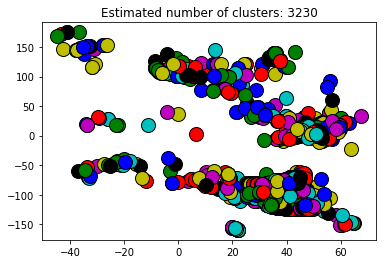

In [8]:
labels = clustering.labels_
cluster_centers = clustering.cluster_centers_

print("Labels: ")
print labels
print("Claster centres: ")
print cluster_centers

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)

# #############################################################################
# Plot result
import matplotlib.pyplot as plt
from itertools import cycle

plt.figure(1)
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(data[my_members, 0], data[my_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [15]:
offices = [(33.751277, -118.188740, 'Los Angeles'), (25.867736, -80.324116, 'Miami'), (51.503016, -0.075479, 'London'), (52.378894, 4.885084, 'Amsterdam'), (39.366487, 117.036146, 'Beijing'), (-33.868457, 151.205134, 'Sydney')] 
dist = []
for o in offices:
    for c in cluster_centers:
        d = ((o[0] - c[0])**2 + (o[1] - c[1])**2)**0.5
        dist.append((d,o,c))
        
dist.sort(key=lambda tup: tup[0])
for d in dist[:20]:
    print d

(0.007834758163107856, (-33.868457, 151.205134, 'Sydney'), array([-33.86063043, 151.20477593]))
(0.009353316185992226, (52.378894, 4.885084, 'Amsterdam'), array([52.37296399,  4.89231722]))
(0.022674066158385495, (25.867736, -80.324116, 'Miami'), array([ 25.84567226, -80.3188906 ]))
(0.05005829482278787, (51.503016, -0.075479, 'London'), array([51.50299126, -0.12553729]))
(0.07084773242719973, (33.751277, -118.18874, 'Los Angeles'), array([  33.80987796, -118.14892381]))
(0.13410903336184654, (25.867736, -80.324116, 'Miami'), array([ 25.78581242, -80.21793804]))
(0.154102829806012, (-33.868457, 151.205134, 'Sydney'), array([-34.00190615, 151.12806905]))
(0.16740596425035326, (25.867736, -80.324116, 'Miami'), array([ 25.70534972, -80.28342874]))
(0.18887596060185083, (25.867736, -80.324116, 'Miami'), array([ 26.01009825, -80.19999059]))
(0.19222726571703244, (-33.868457, 151.205134, 'Sydney'), array([-33.9522629, 151.0321372]))
(0.19577945647763628, (33.751277, -118.18874, 'Los Angeles'